In [1]:
#ngay 28/03/2020
import os
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext


In [2]:
from pyspark.sql import Row, SQLContext

In [3]:
sc = SparkContext()

In [4]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [5]:
sqlContext = SQLContext(sc)

In [6]:
lst = [('John', 10),('Lyna', 9),('Samatha', 8),('Tony', 10)]
rdd = sc.parallelize(lst)
people = rdd.map(lambda x: Row(name=x[0], marks = int(x[1])))
schemaPeople = sqlContext.createDataFrame(people)

In [7]:
schemaPeople

DataFrame[marks: bigint, name: string]

In [8]:
schemaPeople.count()

4

In [9]:
schemaPeople.first()

Row(marks=10, name='John')

In [10]:
from pyspark.sql import SparkSession

In [11]:
spark = SparkSession(sc)

In [12]:
file_name = "hdfs://bigdata.laptrinhpython.net:19000/people.csv"
people = spark.read.csv(file_name, inferSchema = True, header = True)
people.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



In [13]:
file_name_local = "Data/people.csv"
people_local = spark.read.csv(file_name_local, inferSchema = True, header = True)
people_local.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

In [14]:
people_local.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



In [15]:
file_name1 = "hdfs://bigdata.laptrinhpython.net:19000/data.json"
peopleJson = spark.read.json(file_name1)
peopleJson.show(5)

+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|        id|            location|sampling_rate|              sensor|    sensordatavalues|          timestamp|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|5810744647|[112.6, FR, 0, 11...|         null|[22349, 1, [14, N...|[[12340422762, 1....|2019-12-20 03:22:01|
|5810744646|[35.2, DE, 0, 107...|         null|[21149, 7, [9, va...|[[12340422760, 9....|2019-12-20 03:22:01|
|5810744645|[51.0, DE, 0, 293...|         null|[5811, 1, [14, No...|[[12340422757, 6....|2019-12-20 03:22:01|
|5810744644|[34.4, BE, 0, 441...|         null|[8765, 1, [14, No...|[[12340422756, 3....|2019-12-20 03:22:01|
|5810744643|[5.0, FR, 0, 1100...|         null|[21693, 1, [14, N...|[[12340422754, 7....|2019-12-20 03:22:01|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
only showi

In [16]:
peopleJson.printSchema()

root
 |-- id: long (nullable = true)
 |-- location: struct (nullable = true)
 |    |-- altitude: string (nullable = true)
 |    |-- country: string (nullable = true)
 |    |-- exact_location: long (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- indoor: long (nullable = true)
 |    |-- latitude: string (nullable = true)
 |    |-- longitude: string (nullable = true)
 |-- sampling_rate: string (nullable = true)
 |-- sensor: struct (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- pin: string (nullable = true)
 |    |-- sensor_type: struct (nullable = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- manufacturer: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- sensordatavalues: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- value: string (nullable = true)
 |    |    |-- value_type: string (nullable = true)
 |-- timestamp: string (nullab

In [17]:
file_name2 = "Data/Obesity_data.csv"
obesity_data = spark.read.csv(file_name2, inferSchema = True, header = True)
obesity_data.show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 5 rows



In [18]:
obesity_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmc: integer (nullable = true)
 |-- bmd: double (nullable = true)
 |-- fat: integer (nullable = true)
 |-- lean: integer (nullable = true)
 |-- pcfat: double (nullable = true)



In [19]:
obesity_data.count()

1217

In [20]:
peopleJson.count()

35654

In [21]:
people_local.count()

100000

In [22]:
obesity_data.describe().show()

+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|summary|               id|gender|            height|           weight|               bmi|              age|               bmc|               bmd|               fat|             lean|             pcfat|
+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|  count|             1217|  1217|              1217|             1217|              1217|             1217|              1217|              1217|              1217|             1217|              1217|
|   mean| 614.518488085456|  null| 156.7239112571898|55.14379622021364| 22.39539852095314|47.15201314708299|1724.9145439605588|1.0087428101889888|17288.436318816763| 35463.1133935908|31.60

In [23]:
obesity_data.describe("height","weight").show()

+-------+------------------+-----------------+
|summary|            height|           weight|
+-------+------------------+-----------------+
|  count|              1217|             1217|
|   mean| 156.7239112571898|55.14379622021364|
| stddev|7.9777256820417035|9.404988688010084|
|    min|               136|               34|
|    max|               185|               95|
+-------+------------------+-----------------+



In [24]:
#crosstab
obesity_data.crosstab("height", "gender").show()

+-------------+---+---+
|height_gender|  F|  M|
+-------------+---+---+
|          138|  2|  0|
|          170|  1| 24|
|          142| 11|  0|
|          153| 73|  1|
|          174|  0|  2|
|          185|  0|  1|
|          157| 31|  5|
|          152| 54|  2|
|          164| 11| 17|
|          179|  0|  1|
|          147| 18|  0|
|          160| 45| 33|
|          137|  1|  0|
|          165| 10| 37|
|          156| 45|  6|
|          169|  1| 11|
|          141|  6|  0|
|          173|  0|  8|
|          166|  0| 13|
|          148| 35|  3|
+-------------+---+---+
only showing top 20 rows



In [25]:
#groupby
obesity_data.groupby('gender').mean('weight').show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [26]:
#groupby
obesity_data.groupby('gender').mean('height').show()

+------+------------------+
|gender|       avg(height)|
+------+------------------+
|     F|153.29118329466357|
|     M|165.05915492957746|
+------+------------------+



In [27]:
obesity_data.groupby('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  862|
|     M|  355|
+------+-----+



In [28]:
#agg thuc hien nhom| gan 1 hoac nhieu yeu to
obesity_data.groupby('gender').agg({'weight': 'mean'}).show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [29]:
# chieu cao trung binh theo gioi tinh
obesity_data.groupby('gender').agg({'height': 'mean'}).show()

+------+------------------+
|gender|       avg(height)|
+------+------------------+
|     F|153.29118329466357|
|     M|165.05915492957746|
+------+------------------+



In [30]:
obesity_data.groupby('gender').agg({'height': 'min', 'weight': 'min'}).show()

+------+-----------+-----------+
|gender|min(weight)|min(height)|
+------+-----------+-----------+
|     F|         34|        136|
|     M|         38|        146|
+------+-----------+-----------+



In [31]:
# Tao sub DataFrame

df_sub = obesity_data.select('id', 'gender', 'height', 'weight')
df_sub.show()

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
|  3|     F|   157|    57|
|  4|     F|   156|    53|
|  5|     M|   160|    51|
|  6|     F|   153|    47|
|  7|     F|   155|    58|
|  8|     M|   167|    65|
|  9|     M|   165|    54|
| 10|     F|   158|    60|
| 11|     F|   155|    48|
| 12|     M|   165|    65|
| 13|     F|   155|    40|
| 14|     M|   158|    57|
| 15|     F|   154|    59|
| 16|     M|   150|    70|
| 17|     F|   150|    50|
| 18|     M|   158|    65|
| 19|     M|   162|    72|
| 20|     M|   161|    55|
+---+------+------+------+
only showing top 20 rows



In [32]:
obesity_data.select('weight').distinct().count()

55

In [33]:
obesity_data.select('height').distinct().count()

48

In [34]:
obesity_data.select('gender').distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [35]:
# Sap xep du lieu
obesity_data.orderBy(obesity_data.age.desc()).show()

+----+------+------+------+----+---+----+----+-----+-----+-----------+
|  id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|      pcfat|
+----+------+------+------+----+---+----+----+-----+-----+-----------+
| 963|     M|   158|    61|24.4| 88|1670|1.02|18038|39526|       30.5|
| 712|     M|   161|    47|18.1| 87|1678|1.01|12328|32725|       26.4|
| 588|     F|   142|    46|22.8| 85| 875|0.68|13946|31026|       30.4|
|1189|     M|   168|    64|22.7| 85|2292|1.23|16478|42085|       27.1|
|1203|     F|   152|    40|17.3| 85| 819|0.74|10903|25230|       29.5|
|  14|     M|   158|    57|22.8| 84|1772|1.02|13398|40313|       24.1|
|1167|     F|   148|    57|26.0| 84|1583|0.99|21002|35060|       36.4|
| 360|     M|   158|    58|23.2| 84|1891|1.06|15590|38924|       27.6|
| 816|     M|   162|    59|22.5| 84|2370|1.22|15149|39330|       26.6|
| 765|     F|   153|    62|26.5| 84|1397|0.87|23407|36596|       38.1|
|1162|     M|   162|    60|22.9| 83|1641|0.94|16265|40811|       27.7|
|1109|

In [36]:
obesity_data.orderBy(obesity_data.bmi.desc()).show()

+----+------+------+------+----+---+----+----+-----+-----+-----+
|  id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+----+------+------+------+----+---+----+----+-----+-----+-----+
| 931|     F|   160|    95|37.1| 57|2139|1.17|40825|50788| 43.5|
| 377|     F|   153|    85|36.3| 61|1414|0.87|40196|43110| 47.4|
| 362|     F|   150|    80|35.6| 54|1680|0.98|32442|44670| 41.2|
| 381|     M|   148|    76|34.7| 40|2395|1.12|20187|52455| 26.9|
|1081|     F|   142|    70|34.7| 56|1446|0.99|32420|33550| 48.1|
|1035|     F|   152|    75|32.5| 54|1805|1.05|28865|41866| 39.8|
| 898|     M|   172|    95|32.1| 41|2409| 1.1|28220|63059| 30.1|
|1168|     F|   143|    65|31.8| 70|1439|0.88|28224|35008| 43.6|
|  16|     M|   150|    70|31.1| 49|2084| 1.0|16540|49512| 24.3|
|1148|     F|   153|    72|30.8| 52|1975|1.12|31274|38461| 43.6|
| 567|     F|   167|    85|30.5| 21|2663|1.19|29673|52982| 34.8|
| 232|     F|   146|    65|30.5| 47|1736|1.07|25734|36949| 39.9|
|1051|     F|   153|    7

In [37]:
obesity_data.orderBy(obesity_data.age.desc(),obesity_data.bmi.desc()).show()

+----+------+------+------+----+---+----+----+-----+-----+-----------+
|  id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|      pcfat|
+----+------+------+------+----+---+----+----+-----+-----+-----------+
| 963|     M|   158|    61|24.4| 88|1670|1.02|18038|39526|       30.5|
| 712|     M|   161|    47|18.1| 87|1678|1.01|12328|32725|       26.4|
| 588|     F|   142|    46|22.8| 85| 875|0.68|13946|31026|       30.4|
|1189|     M|   168|    64|22.7| 85|2292|1.23|16478|42085|       27.1|
|1203|     F|   152|    40|17.3| 85| 819|0.74|10903|25230|       29.5|
| 765|     F|   153|    62|26.5| 84|1397|0.87|23407|36596|       38.1|
|1167|     F|   148|    57|26.0| 84|1583|0.99|21002|35060|       36.4|
| 360|     M|   158|    58|23.2| 84|1891|1.06|15590|38924|       27.6|
|  14|     M|   158|    57|22.8| 84|1772|1.02|13398|40313|       24.1|
| 816|     M|   162|    59|22.5| 84|2370|1.22|15149|39330|       26.6|
|1109|     F|   145|    50|23.8| 83|1203|0.89|21124|29385|       40.8|
|1162|

In [38]:
#Tao cot moi
df_sub.withColumn('bmi', (df_sub.weight/(df_sub.weight/100) **2)).show(5)

+---+------+------+------+------------------+
| id|gender|height|weight|               bmi|
+---+------+------+------+------------------+
|  1|     F|   150|    49|204.08163265306123|
|  2|     M|   165|    52| 192.3076923076923|
|  3|     F|   157|    57|175.43859649122808|
|  4|     F|   156|    53|188.67924528301884|
|  5|     M|   160|    51|196.07843137254903|
+---+------+------+------+------------------+
only showing top 5 rows



In [39]:
# Doi ten cot
df_sub.withColumnRenamed('gender', 'sex').show(3)

+---+---+------+------+
| id|sex|height|weight|
+---+---+------+------+
|  1|  F|   150|    49|
|  2|  M|   165|    52|
|  3|  F|   157|    57|
+---+---+------+------+
only showing top 3 rows



In [40]:
df_sub.columns

['id', 'gender', 'height', 'weight']

In [41]:
df_sub.drop('bmi').show(2)

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
+---+------+------+------+
only showing top 2 rows



In [42]:
people.count()

100000

In [43]:
people.dropDuplicates()

DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: string]

In [44]:
people.count()

100000

In [45]:
people.dropna().count()

98080

In [46]:
#Loc dlieu
# filter, where
people_sub = people.filter(people.name.like("I%p"))
people_sub.show()



+-----+---------+-------------+------+-------------+
|  _c0|person_id|         name|   sex|date of birth|
+-----+---------+-------------+------+-------------+
|    2|      102|    Ida Shipp|female|   1962-05-24|
| 5791|     5891| Isaias Stepp|  male|   1974-04-13|
| 9965|    10065| Isabel Sharp|female|   1967-11-28|
|58576|    58676|Isadora Tripp|female|   1971-06-05|
|68125|    68225|   Irene Kulp|female|   1986-07-06|
|71572|    71672|    Ivan Ropp|  male|   1975-07-08|
|92061|    92161|   Inez Estep|female|   1925-09-03|
+-----+---------+-------------+------+-------------+



In [47]:
people_sub.count()

7

In [48]:
people_where = people.where(people.name.contains('Moore'))
people_where.count()

352

In [49]:
people_where.show()

+----+---------+--------------+------+-------------+
| _c0|person_id|          name|   sex|date of birth|
+----+---------+--------------+------+-------------+
|   3|      103|  Joanna Moore|female|   2017-03-10|
| 430|      530| Richard Moore|  male|   1989-05-11|
| 484|      584|    Mary Moore|female|   1979-05-15|
| 528|      628|    Rose Moore|female|   1975-05-02|
| 659|      759|Nicholas Moore|  male|   1981-10-10|
|1163|     1263| Russell Moore|  male|   1991-12-08|
|1410|     1510|   Doris Moore|female|   1969-12-23|
|1463|     1563|  Claire Moore|female|  20175-02-28|
|1895|     1995|  George Moore|  male|   1974-01-10|
|2213|     2313|    Earl Moore|  male|   2003-05-08|
|2467|     2567|  Cheryl Moore|female|   1998-09-28|
|2652|     2752|  Sergio Moore|  null|   1972-06-24|
|2787|     2887| Darrell Moore|  male|   1986-09-04|
|3226|     3326| Marissa Moore|female|   2005-04-14|
|3524|     3624|   Jaime Moore|  male|   2011-02-28|
|3632|     3732|     Eva Moore|female|   1978-

In [50]:
people_where_not = people.where(~people.name.contains('Moore'))
people_where_not.count()

99648

In [51]:
people_where_not.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|      115|Robert Mcreynolds|  male|   1973-12-27|
| 16|     

In [52]:
people_where_id = people.where(people.person_id == 100)
people_where_id.show()

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
+---+---------+--------------+------+-------------+



In [53]:
people_filtermore = people.filter((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31'))
people_filtermore.count()

1366

In [54]:
from pyspark.sql.functions import *

In [55]:
people.withColumn('upper_name', upper(col('name'))).show(3)

+---+---------+--------------+------+-------------+--------------+
|_c0|person_id|          name|   sex|date of birth|    upper_name|
+---+---------+--------------+------+-------------+--------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|PENELOPE LEWIS|
|  1|      101| David Anthony|  male|   1971-10-14| DAVID ANTHONY|
|  2|      102|     Ida Shipp|female|   1962-05-24|     IDA SHIPP|
+---+---------+--------------+------+-------------+--------------+
only showing top 3 rows



In [56]:
from pyspark.sql.types import *

In [57]:
# chuyen doi kieu du lieu
people_year = people.withColumn('year', substring('date of birth', pos=0, len=4).cast(IntegerType()))

In [58]:
people_year.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)
 |-- year: integer (nullable = true)



In [59]:
# bieu thuc dieu kien condition
#when(if condition, then x)
#otherwise()
obesity_data.select(obesity_data.height, when(obesity_data.height <= 150, "Short").otherwise('Tall')).show(5)

+------+--------------------------------------------------+
|height|CASE WHEN (height <= 150) THEN Short ELSE Tall END|
+------+--------------------------------------------------+
|   150|                                             Short|
|   165|                                              Tall|
|   157|                                              Tall|
|   156|                                              Tall|
|   160|                                              Tall|
+------+--------------------------------------------------+
only showing top 5 rows



In [60]:
obesity_data.select(obesity_data.height, when(obesity_data.height <= 150, "Short")
                    .when(obesity_data.height <= 160, "Midium")
                    .otherwise('Tall').alias('Type')).show(5)

+------+------+
|height|  Type|
+------+------+
|   150| Short|
|   165|  Tall|
|   157|Midium|
|   156|Midium|
|   160|Midium|
+------+------+
only showing top 5 rows



In [61]:
from pyspark.sql.functions import udf

In [62]:
# Tu dinh nghia function
def bmi_type(bmi):
    bmi_type =""
    if bmi <= 18.5:
        bmi_type = "Under weight"
    elif bmi <= 24.9:
        bmi_type = "Normal weight"
    elif bmi <= 29.9:
        bmi_type = "Over weight"
    else:
        bmi_type = "Obesity"
    return bmi_type
    

In [63]:
udfBMI = udf(bmi_type, StringType())
obesity_data.withColumn('bmi_type', udfBMI(obesity_data.bmi)).show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+-------------+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|     bmi_type|
+---+------+------+------+----+---+----+----+-----+-----+-----+-------------+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|Normal weight|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|Normal weight|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|Normal weight|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|Normal weight|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|Normal weight|
+---+------+------+------+----+---+----+----+-----+-----+-----+-------------+
only showing top 5 rows



In [64]:
## chart
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df_pandas = obesity_data.toPandas()

In [66]:
df_pandas.skew()

id       -0.000515
height    0.473462
weight    0.672430
bmi       0.534646
age      -0.008657
bmc       0.300742
bmd      -0.148707
fat       0.360215
lean      0.900620
pcfat    -0.486587
dtype: float64

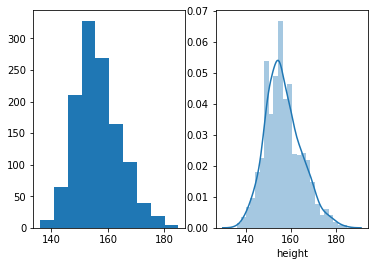

In [67]:
plt.subplot(1,2,1)
plt.hist(df_pandas['height'])
plt.subplot(1,2,2)
sns.distplot(df_pandas['height'])
plt.show()

In [68]:
df_pandas['height'].skew()

0.4734624088426363

In [69]:
#SQL
#Tao bang tam
people.createOrReplaceTempView('people')

In [70]:
# SQL
query = "SELECT name FROM people"
people_df_names = spark.sql(query)

In [71]:
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [72]:
people_female = spark.sql("SELECT * FROM people WHERE sex=='female'")
people_female.show()


+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 16|      116|   Carla Spickard|female|   1985-06-13|
| 17|      117|Florence Eberhart|female|   2024-06-01|
| 18|      118|     Tina Gaskins|female|   1966-12-05|
| 19|      119| Florence Mulhern|female|   1959-05-31|
| 21|      121|    Evelyn Kriner|female|   1978-09-16|
| 22|      122|     Heather Luce|female|   2012-02-24|
| 26|      126|      Marion Baca|female|   1948-03-04|
| 27|      127|       Devona Kay|female|   2009-12-30|
| 28|      128|   Betty Endicott|female|   1992-05-01|
| 30|     

In [73]:
people_male = spark.sql("select * from people where sex == 'male'").show(5)

+---+---------+----------------+----+-------------+
|_c0|person_id|            name| sex|date of birth|
+---+---------+----------------+----+-------------+
|  1|      101|   David Anthony|male|   1971-10-14|
|  5|      105|   David Simmons|male|   1999-12-30|
|  6|      106|   Edward Hudson|male|   1983-05-09|
|  7|      107|    Albert Jones|male|   1990-09-13|
|  8|      108|Leonard Cavender|male|   1958-08-08|
+---+---------+----------------+----+-------------+
only showing top 5 rows



In [74]:
## LIKE
people_vadala = spark.sql("Select * From people Where name like '%Vadala'")
people_vadala.show(2)

+-----+---------+--------------+------+-------------+
|  _c0|person_id|          name|   sex|date of birth|
+-----+---------+--------------+------+-------------+
|    9|      109|Everett Vadala|  male|   2005-05-24|
|77207|    77307| Marlyn Vadala|female|   1992-07-02|
+-----+---------+--------------+------+-------------+



In [75]:
people_Albert  = spark.sql("Select * From people Where name like 'Albert%'").show(3)

+----+---------+---------------+----+-------------+
| _c0|person_id|           name| sex|date of birth|
+----+---------+---------------+----+-------------+
|   7|      107|   Albert Jones|male|   1990-09-13|
| 380|      480|Albert Guillory|male|   2001-02-10|
|1577|     1677|  Albert Miller|male|   1976-09-16|
+----+---------+---------------+----+-------------+
only showing top 3 rows



In [76]:
## substring
name_sub = spark.sql("select substring(name, 0, 10) as SubName From people where name like 'Albert%'").show(3)


+----------+
|   SubName|
+----------+
|Albert Jon|
|Albert Gui|
|Albert Mil|
+----------+
only showing top 3 rows



In [78]:
#SQL voi DataFrame API
spark.sql("Select * From people").show(2) 
people.select("name").show(2)


+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
+---+---------+--------------+------+-------------+
only showing top 2 rows

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
+--------------+
only showing top 2 rows



In [ ]:
#SQL voi DataFrame API WHERE
spark.sql("Select * From people Where sex = 'male'").show()
#------
people.where(people.sex == 'male')


In [ ]:
#SQL voi DataFrame API LIKE/ startswith/ endswith
spark.sql("Select * From people Where name like '%Vadala'").show()
#-----
people.where(people.name.like('%Vadala'))
people.where(people.name.endswith('Vadala'))


In [ ]:
# Substring


In [ ]:
#Tim thay the gia tri null
#DataFrame.na.fill(value)
# Phan vung du lieu
people.repartitions(10).rdd.getNumPartitions()